In [7]:
# import dependencies
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# since model is trained on imagenet size should be 224x224
IMAGE_SIZE = [224, 224]

In [3]:
train_path = './dataset/train'
test_path = './dataset/test'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [63]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [111]:
from tensorflow.keras import optimizers
import tensorflow


metrics_keras = [
                tensorflow.keras.metrics.AUC(name="auc"),
                tensorflow.keras.metrics.BinaryAccuracy(name="acc"),
                tensorflow.keras.metrics.TruePositives(name="positive"),
                tensorflow.keras.metrics.TrueNegatives(name="negative"),
                tensorflow.keras.metrics.Precision(name="precision"),
                tensorflow.keras.metrics.Recall(name="recall"),
]

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=metrics_keras)

In [15]:
train_dataget = ImageDataGenerator(
                                    preprocessing_function=preprocess_input,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [16]:
test_dataget = ImageDataGenerator(
                                    preprocessing_function=preprocess_input,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [17]:
train_set = train_dataget.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [18]:
test_set = test_dataget.flow_from_directory(test_path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [116]:
import tensorflow
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# checkpoint = ModelCheckpoint(filepath='mymodel.h5',
#                               verbose=2, save_best_only=True)

lr_reduce = ReduceLROnPlateau(monitor='auc', mode="max", factor=0.8, min_delta=0.001, patience=20, verbose=1)

callbacks = [lr_reduce]


In [117]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=10,
                            steps_per_epoch=5,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=2)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
5/5 - 8s - loss: 2.4234 - auc: 0.8154 - acc: 0.7812 - positive: 125.0000 - negative: 125.0000 - precision: 0.7812 - recall: 0.7812 - lr: 0.0010 - 8s/epoch - 2s/step
Epoch 2/10
5/5 - 10s - loss: 2.6541 - auc: 0.7948 - acc: 0.7688 - positive: 123.0000 - negative: 123.0000 - precision: 0.7688 - recall: 0.7688 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 3/10
5/5 - 10s - loss: 1.8726 - auc: 0.8247 - acc: 0.8188 - positive: 131.0000 - negative: 131.0000 - precision: 0.8188 - recall: 0.8188 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 4/10
5/5 - 10s - loss: 1.7130 - auc: 0.8716 - acc: 0.8375 - positive: 134.0000 - negative: 134.0000 - precision: 0.8375 - recall: 0.8375 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 5/10
5/5 - 10s - loss: 2.0645 - auc: 0.8463 - acc: 0.8125 - positive: 130.0000 - negative: 130.0000 - precision: 0.8125 - recall: 0.8125 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 6/10
5/5 - 10s - loss: 1.3634 - auc: 0.8693 - acc: 0.8375 - positive: 134.0000 - negative: 134.0000 - prec

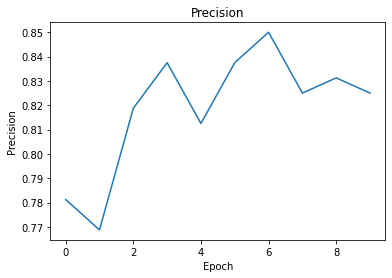

In [119]:
plt.plot(model_history.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

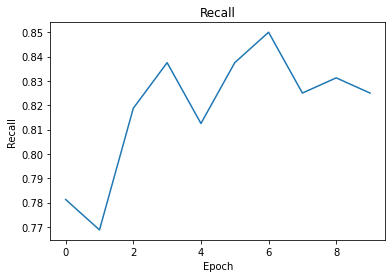

In [121]:
plt.plot(model_history.history['recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

In [122]:
old_history = model_history.history.copy()

In [123]:
evaluation = model.evaluate(test_set)

21/21 [==============================] - 35s 2s/step - loss: 2.6717 - auc: 0.7951 - acc: 0.7712 - positive: 509.0000 - negative: 509.0000 - precision: 0.7712 - recall: 0.7712


In [125]:
evaluation

[2.6717164516448975,
 0.7950619459152222,
 0.771212100982666,
 509.0,
 509.0,
 0.771212100982666,
 0.771212100982666]

In [129]:
print('LOSS:  ', evaluation[0])
print('AUC:  ', evaluation[1])
print('ACC:   ', evaluation[2])
print('Positive:   ', evaluation[3])
print('Negative:   ', evaluation[4])
print('Precision:   ', evaluation[5])
print('Recall:    ', evaluation[6])

LOSS:   2.6717164516448975
AUC:   0.7950619459152222
ACC:    0.771212100982666
Positive:    509.0
Negative:    509.0
Precision:    0.771212100982666
Recall:     0.771212100982666


In [130]:
model_history.history

{'loss': [2.4233663082122803,
  2.6540892124176025,
  1.8726037740707397,
  1.7130115032196045,
  2.0644993782043457,
  1.3634272813796997,
  2.4153151512145996,
  1.9851596355438232,
  1.5888046026229858,
  1.6476818323135376],
 'auc': [0.8153906464576721,
  0.7947655916213989,
  0.8247265815734863,
  0.8716406226158142,
  0.8463281989097595,
  0.8692969083786011,
  0.8477343916893005,
  0.845507800579071,
  0.8505077958106995,
  0.8474999666213989],
 'acc': [0.78125,
  0.768750011920929,
  0.8187500238418579,
  0.8374999761581421,
  0.8125,
  0.8374999761581421,
  0.8500000238418579,
  0.824999988079071,
  0.831250011920929,
  0.824999988079071],
 'positive': [125.0,
  123.0,
  131.0,
  134.0,
  130.0,
  134.0,
  136.0,
  132.0,
  133.0,
  132.0],
 'negative': [125.0,
  123.0,
  131.0,
  134.0,
  130.0,
  134.0,
  136.0,
  132.0,
  133.0,
  132.0],
 'precision': [0.78125,
  0.768750011920929,
  0.8187500238418579,
  0.8374999761581421,
  0.8125,
  0.8374999761581421,
  0.850000023841

# Trying model with higher learning rate

In [132]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [134]:
from tensorflow.keras import optimizers
import tensorflow


metrics_keras = [
                tensorflow.keras.metrics.AUC(name="auc"),
                tensorflow.keras.metrics.BinaryAccuracy(name="acc"),
                tensorflow.keras.metrics.TruePositives(name="positive"),
                tensorflow.keras.metrics.TrueNegatives(name="negative"),
                tensorflow.keras.metrics.Precision(name="precision"),
                tensorflow.keras.metrics.Recall(name="recall"),
]

adam = optimizers.Adam(learning_rate=0.015)
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=metrics_keras)

In [135]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=10,
                            steps_per_epoch=5,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=2)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
5/5 - 46s - loss: 50.2614 - auc: 0.7526 - acc: 0.7125 - positive: 114.0000 - negative: 114.0000 - precision: 0.7125 - recall: 0.7125 - val_loss: 58.6866 - val_auc: 0.7879 - val_acc: 0.7833 - val_positive: 517.0000 - val_negative: 517.0000 - val_precision: 0.7833 - val_recall: 0.7833 - lr: 0.0150 - 46s/epoch - 9s/step
Epoch 2/10
5/5 - 10s - loss: 37.7615 - auc: 0.7750 - acc: 0.7750 - positive: 124.0000 - negative: 124.0000 - precision: 0.7750 - recall: 0.7750 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 3/10
5/5 - 10s - loss: 45.3279 - auc: 0.7750 - acc: 0.7750 - positive: 124.0000 - negative: 124.0000 - precision: 0.7750 - recall: 0.7750 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 4/10
5/5 - 10s - loss: 30.1678 - auc: 0.8050 - acc: 0.8000 - positive: 128.0000 - negative: 128.0000 - precision: 0.8000 - recall: 0.8000 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 5/10
5/5 - 10s - loss: 16.1868 - auc: 0.8733 - acc: 0.8625 - positive: 138.0000 - negative: 138.0000 - precision: 0.8625 - reca

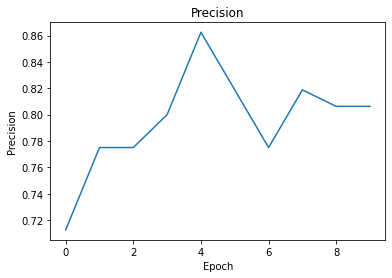

In [136]:
plt.plot(model_history.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

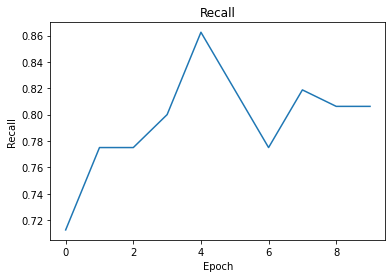

In [137]:
plt.plot(model_history.history['recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

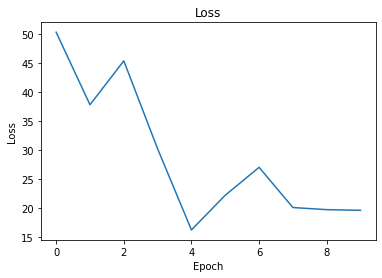

In [138]:
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [139]:
old_history2 = model_history.history.copy()

In [140]:
evaluation = model.evaluate(test_set)

21/21 [==============================] - 36s 2s/step - loss: 25.6220 - auc: 0.7920 - acc: 0.7879 - positive: 520.0000 - negative: 520.0000 - precision: 0.7879 - recall: 0.7879


In [141]:
print('LOSS:  ', evaluation[0])
print('AUC:  ', evaluation[1])
print('ACC:   ', evaluation[2])
print('Positive:   ', evaluation[3])
print('Negative:   ', evaluation[4])
print('Precision:   ', evaluation[5])
print('Recall:    ', evaluation[6])

LOSS:   25.62196922302246
AUC:   0.7920202016830444
ACC:    0.7878788113594055
Positive:    520.0
Negative:    520.0
Precision:    0.7878788113594055
Recall:     0.7878788113594055


### model became a bit better let's continue training the model with 100 epoch

In [142]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=100,
                            steps_per_epoch=5,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=2)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
5/5 - 46s - loss: 26.9282 - auc: 0.7875 - acc: 0.7875 - positive: 126.0000 - negative: 126.0000 - precision: 0.7875 - recall: 0.7875 - val_loss: 29.0626 - val_auc: 0.7538 - val_acc: 0.7500 - val_positive: 495.0000 - val_negative: 495.0000 - val_precision: 0.7500 - val_recall: 0.7500 - lr: 0.0150 - 46s/epoch - 9s/step
Epoch 2/100
5/5 - 10s - loss: 20.6616 - auc: 0.7975 - acc: 0.7937 - positive: 127.0000 - negative: 127.0000 - precision: 0.7937 - recall: 0.7937 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 3/100
5/5 - 10s - loss: 22.0233 - auc: 0.7707 - acc: 0.7688 - positive: 123.0000 - negative: 123.0000 - precision: 0.7688 - recall: 0.7688 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 4/100


KeyboardInterrupt: 

In [19]:
train_set.batch_size = 32
test_set.batch_size = 32

In [144]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=100,
                            steps_per_epoch=5,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=2)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
5/5 - 7s - loss: 23.9443 - auc: 0.8141 - acc: 0.8062 - positive: 129.0000 - negative: 129.0000 - precision: 0.8062 - recall: 0.8062 - lr: 0.0150 - 7s/epoch - 1s/step
Epoch 2/100
5/5 - 8s - loss: 20.7145 - auc: 0.8375 - acc: 0.8375 - positive: 134.0000 - negative: 134.0000 - precision: 0.8375 - recall: 0.8375 - lr: 0.0150 - 8s/epoch - 2s/step
Epoch 3/100
5/5 - 10s - loss: 21.7632 - auc: 0.7925 - acc: 0.7937 - positive: 127.0000 - negative: 127.0000 - precision: 0.7937 - recall: 0.7937 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 4/100
5/5 - 10s - loss: 22.2425 - auc: 0.7577 - acc: 0.7500 - positive: 120.0000 - negative: 120.0000 - precision: 0.7500 - recall: 0.7500 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 5/100
5/5 - 10s - loss: 15.6570 - auc: 0.8354 - acc: 0.8313 - positive: 133.0000 - negative: 133.0000 - precision: 0.8313 - recall: 0.8313 - lr: 0.0150 - 10s/epoch - 2s/step
Epoch 6/100
5/5 - 10s - loss: 20.0646 - auc: 0.7835 - acc: 0.7812 - positive: 125.0000 - negative: 125.0

Epoch 46/100
5/5 - 10s - loss: 14.7207 - auc: 0.8687 - acc: 0.8687 - positive: 139.0000 - negative: 139.0000 - precision: 0.8687 - recall: 0.8687 - lr: 0.0120 - 10s/epoch - 2s/step
Epoch 47/100
5/5 - 10s - loss: 19.7811 - auc: 0.8100 - acc: 0.8000 - positive: 128.0000 - negative: 128.0000 - precision: 0.8000 - recall: 0.8000 - lr: 0.0120 - 10s/epoch - 2s/step
Epoch 48/100
5/5 - 10s - loss: 20.1994 - auc: 0.8438 - acc: 0.8438 - positive: 135.0000 - negative: 135.0000 - precision: 0.8438 - recall: 0.8438 - lr: 0.0120 - 10s/epoch - 2s/step
Epoch 49/100
5/5 - 10s - loss: 24.1404 - auc: 0.8050 - acc: 0.8062 - positive: 129.0000 - negative: 129.0000 - precision: 0.8062 - recall: 0.8062 - lr: 0.0120 - 10s/epoch - 2s/step
Epoch 50/100
5/5 - 10s - loss: 19.9265 - auc: 0.8418 - acc: 0.8438 - positive: 135.0000 - negative: 135.0000 - precision: 0.8438 - recall: 0.8438 - lr: 0.0120 - 10s/epoch - 2s/step
Epoch 51/100
5/5 - 10s - loss: 16.3412 - auc: 0.8313 - acc: 0.8313 - positive: 133.0000 - negat

Epoch 91/100
5/5 - 10s - loss: 27.3395 - auc: 0.7847 - acc: 0.7750 - positive: 124.0000 - negative: 124.0000 - precision: 0.7750 - recall: 0.7750 - lr: 0.0096 - 10s/epoch - 2s/step
Epoch 92/100
5/5 - 10s - loss: 21.8083 - auc: 0.8150 - acc: 0.8000 - positive: 128.0000 - negative: 128.0000 - precision: 0.8000 - recall: 0.8000 - lr: 0.0096 - 10s/epoch - 2s/step
Epoch 93/100
5/5 - 10s - loss: 17.8919 - auc: 0.8345 - acc: 0.8375 - positive: 134.0000 - negative: 134.0000 - precision: 0.8375 - recall: 0.8375 - lr: 0.0096 - 10s/epoch - 2s/step
Epoch 94/100
5/5 - 10s - loss: 17.7105 - auc: 0.8364 - acc: 0.8313 - positive: 133.0000 - negative: 133.0000 - precision: 0.8313 - recall: 0.8313 - lr: 0.0096 - 10s/epoch - 2s/step
Epoch 95/100

Epoch 95: ReduceLROnPlateau reducing learning rate to 0.0076800003647804265.
5/5 - 10s - loss: 16.8253 - auc: 0.8353 - acc: 0.8250 - positive: 132.0000 - negative: 132.0000 - precision: 0.8250 - recall: 0.8250 - lr: 0.0096 - 10s/epoch - 2s/step
Epoch 96/100
5/5 

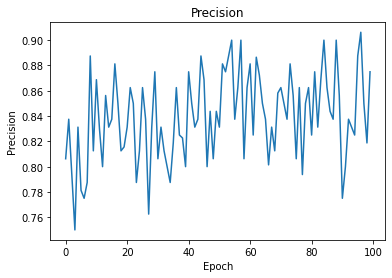

In [145]:
plt.plot(model_history.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

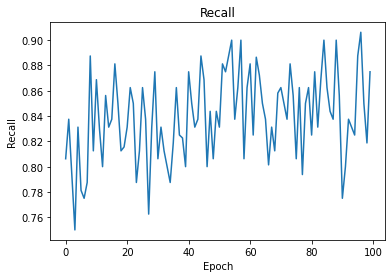

In [146]:
plt.plot(model_history.history['recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

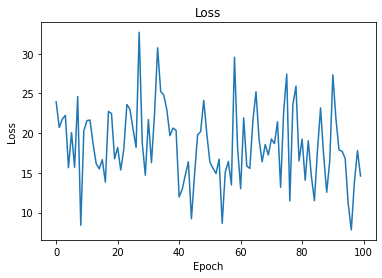

In [147]:
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## bad results ((((((.

# Try with lower learning rate

In [148]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [149]:
from tensorflow.keras import optimizers
import tensorflow


metrics_keras = [
                tensorflow.keras.metrics.AUC(name="auc"),
                tensorflow.keras.metrics.BinaryAccuracy(name="acc"),
                tensorflow.keras.metrics.TruePositives(name="positive"),
                tensorflow.keras.metrics.TrueNegatives(name="negative"),
                tensorflow.keras.metrics.Precision(name="precision"),
                tensorflow.keras.metrics.Recall(name="recall"),
]

adam = optimizers.Adam(learning_rate=0.0003)
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=metrics_keras)

In [150]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=10,
                            steps_per_epoch=5,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=2)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
5/5 - 46s - loss: 2.4804 - auc: 0.5246 - acc: 0.5312 - positive: 85.0000 - negative: 85.0000 - precision: 0.5312 - recall: 0.5312 - val_loss: 2.2135 - val_auc: 0.6847 - val_acc: 0.6485 - val_positive: 428.0000 - val_negative: 428.0000 - val_precision: 0.6485 - val_recall: 0.6485 - lr: 3.0000e-04 - 46s/epoch - 9s/step
Epoch 2/10
5/5 - 10s - loss: 1.7350 - auc: 0.7377 - acc: 0.7188 - positive: 115.0000 - negative: 115.0000 - precision: 0.7188 - recall: 0.7188 - lr: 3.0000e-04 - 10s/epoch - 2s/step
Epoch 3/10
5/5 - 10s - loss: 1.1662 - auc: 0.8424 - acc: 0.8000 - positive: 128.0000 - negative: 128.0000 - precision: 0.8000 - recall: 0.8000 - lr: 3.0000e-04 - 10s/epoch - 2s/step
Epoch 4/10
5/5 - 10s - loss: 1.4786 - auc: 0.8090 - acc: 0.7563 - positive: 121.0000 - negative: 121.0000 - precision: 0.7563 - recall: 0.7563 - lr: 3.0000e-04 - 10s/epoch - 2s/step
Epoch 5/10
5/5 - 10s - loss: 1.2492 - auc: 0.8244 - acc: 0.7937 - positive: 127.0000 - negative: 127.0000 - precision: 0.793

# Try with even less learning rate and try sigmoid activation function, change step size to right one len(train data) // batch size

In [8]:
x = Flatten()(vgg.output)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = Dense(25088/2, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
prediction = Dense(2, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras import optimizers
import tensorflow


metrics_keras = [
                tensorflow.keras.metrics.AUC(name="auc"),
                tensorflow.keras.metrics.BinaryAccuracy(name="acc"),
                tensorflow.keras.metrics.TruePositives(name="positive"),
                tensorflow.keras.metrics.TrueNegatives(name="negative"),
                tensorflow.keras.metrics.Precision(name="precision"),
                tensorflow.keras.metrics.Recall(name="recall"),
]

adam = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=metrics_keras)

In [174]:
import tensorflow
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                              verbose=2, save_best_only=True)

lr_reduce = ReduceLROnPlateau(monitor='auc', mode="max", factor=0.2, min_delta=0.001, patience=5, verbose=1)

callbacks = [lr_reduce, checkpoint]

In [175]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=10,
                            steps_per_epoch=2637 // train_set.batch_size,
                            validation_steps=32,
                            callbacks=callbacks, 
                            verbose=1)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
82/82 [==============================] - 266s 3s/step - loss: 4.4703 - auc: 0.7842 - acc: 0.7578 - positive: 1972.0000 - negative: 1976.0000 - precision: 0.7582 - recall: 0.7570 - val_loss: 2.4677 - val_auc: 0.8309 - val_acc: 0.8023 - val_positive: 564.0000 - val_negative: 495.0000 - val_precision: 0.7737 - val_recall: 0.8545 - lr: 1.0000e-04
Epoch 2/10
82/82 [==============================] - 217s 3s/step - loss: 3.3515 - auc: 0.8230 - acc: 0.7967 - positive: 2077.0000 - negative: 2074.0000 - precision: 0.7964 - recall: 0.7973 - lr: 1.0000e-04
Epoch 3/10
82/82 [==============================] - 219s 3s/step - loss: 2.6179 - auc: 0.8380 - acc: 0.8058 - positive: 2098.0000 - negative: 2100.0000 - precision: 0.8060 - recall: 0.8054 - lr: 1.0000e-04
Epoch 4/10
82/82 [==============================] - 218s 3s/step - loss: 2.1520 - auc: 0.8486 - acc: 0.8129 - positive: 2118.0000 - negative: 2117.0000 - precision: 0.8127 - recall: 0.8131 - lr: 1.0000e-04
Epoch 5/10
82/82 [========

# we got better result after tuning our model a bit but training time increased because of the increasing steps per epoch

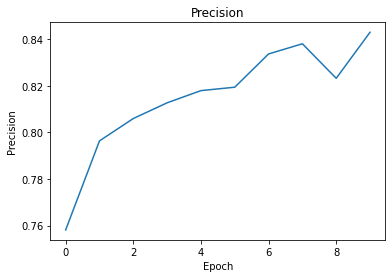

In [177]:
plt.plot(model_history.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

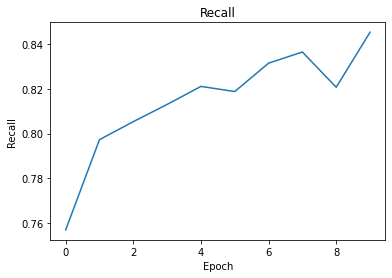

In [178]:
plt.plot(model_history.history['recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

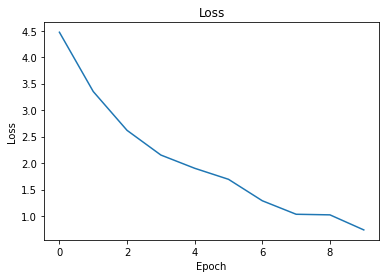

In [179]:
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [180]:
evaluation = model.evaluate(test_set)

21/21 [==============================] - 38s 2s/step - loss: 0.7103 - auc: 0.8961 - acc: 0.8318 - positive: 554.0000 - negative: 544.0000 - precision: 0.8269 - recall: 0.8394


In [181]:
print('LOSS:  ', evaluation[0])
print('AUC:  ', evaluation[1])
print('ACC:   ', evaluation[2])
print('Positive:   ', evaluation[3])
print('Negative:   ', evaluation[4])
print('Precision:   ', evaluation[5])
print('Recall:    ', evaluation[6])

LOSS:   0.7102922201156616
AUC:   0.8961111307144165
ACC:    0.831818163394928
Positive:    554.0
Negative:    544.0
Precision:    0.8268656730651855
Recall:     0.8393939137458801


# Let's try model without Dropout and Additional Dense layers

In [27]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [11]:
from tensorflow.keras import optimizers


metrics_keras = [
                tensorflow.keras.metrics.AUC(name="auc"),
                tensorflow.keras.metrics.BinaryAccuracy(name="acc"),
                tensorflow.keras.metrics.TruePositives(name="positive"),
                tensorflow.keras.metrics.TrueNegatives(name="negative"),
                tensorflow.keras.metrics.Precision(name="precision"),
                tensorflow.keras.metrics.Recall(name="recall"),
]

adam = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=metrics_keras)

In [13]:
import tensorflow
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                              verbose=1, save_best_only=True)

lr_reduce = ReduceLROnPlateau(monitor='auc', mode="max", factor=0.2, min_delta=0.0001, patience=5, verbose=1)

callbacks = [lr_reduce, checkpoint]

In [ ]:
start = datetime.now()

model_history=model.fit_generator(
                            train_set,
                            validation_data=test_set,
                            epochs=100,
                            steps_per_epoch= 2637 // train_set.batch_size,
                            validation_steps=630 // test_set.batch_size,
                            validation_freq=1,
                            callbacks=callbacks, 
                            verbose=1)

duration = datetime.now() - start
print("Training completed in time:  ", duration)

C:\Users\Shahzod\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100
82/82 [==============================] - ETA: 0s - loss: 4.9071 - auc: 0.7820 - acc: 0.7560 - positive: 1963.0000 - negative: 1976.0000 - precision: 0.7573 - recall: 0.7536
Epoch 1: val_loss improved from inf to 2.92894, saving model to mymodel.h5
82/82 [==============================] - 259s 3s/step - loss: 4.9071 - auc: 0.7820 - acc: 0.7560 - positive: 1963.0000 - negative: 1976.0000 - precision: 0.7573 - recall: 0.7536 - val_loss: 2.9289 - val_auc: 0.8222 - val_acc: 0.7837 - val_positive: 443.0000 - val_negative: 510.0000 - val_precision: 0.8189 - val_recall: 0.7286 - lr: 1.0000e-04
Epoch 2/100
82/82 [==============================] - ETA: 0s - loss: 3.0206 - auc: 0.8272 - acc: 0.7952 - positive: 2076.0000 - negative: 2067.0000 - precision: 0.7942 - recall: 0.7969
Epoch 2: val_loss improved from 2.92894 to 2.06684, saving model to mymodel.h5
82/82 [==============================] - 265s 3s/step - loss: 3.0206 - auc: 0.8272 - acc: 0.7952 - positive: 2076.0000 - negative: 

In [186]:
evaluation = model.evaluate(test_set)

21/21 [==============================] - 37s 2s/step - loss: 0.6732 - auc: 0.8975 - acc: 0.8258 - positive: 561.0000 - negative: 529.0000 - precision: 0.8107 - recall: 0.8500


In [187]:
print('LOSS:  ', evaluation[0])
print('AUC:  ', evaluation[1])
print('ACC:   ', evaluation[2])
print('Positive:   ', evaluation[3])
print('Negative:   ', evaluation[4])
print('Precision:   ', evaluation[5])
print('Recall:    ', evaluation[6])

LOSS:   0.6732257008552551
AUC:   0.8975080251693726
ACC:    0.8257575631141663
Positive:    561.0
Negative:    529.0
Precision:    0.810693621635437
Recall:     0.8500000238418579


In [188]:
model.save_weights('mymodel.h5')

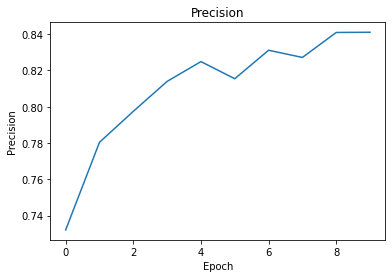

In [189]:
plt.plot(model_history.history['precision'])
plt.title('Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.show()

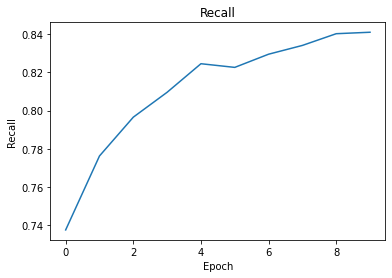

In [190]:
plt.plot(model_history.history['recall'])
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.show()

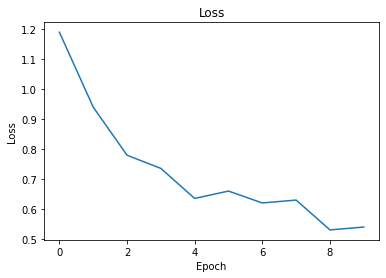

In [191]:
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [192]:
model_history.history

{'loss': [1.1905491352081299,
  0.9402700066566467,
  0.7798566222190857,
  0.7357463836669922,
  0.6354591250419617,
  0.6601080894470215,
  0.6203768253326416,
  0.6300827264785767,
  0.53037029504776,
  0.5399621725082397],
 'auc': [0.7983686923980713,
  0.8476225733757019,
  0.8723217844963074,
  0.8818537592887878,
  0.8973702192306519,
  0.8945530652999878,
  0.904252827167511,
  0.9003869295120239,
  0.9173588156700134,
  0.9161545038223267],
 'acc': [0.7337812185287476,
  0.7788867354393005,
  0.7971209287643433,
  0.8122840523719788,
  0.8247600793838501,
  0.8182341456413269,
  0.8305182456970215,
  0.8299424052238464,
  0.8406909704208374,
  0.8410748839378357],
 'positive': [1921.0,
  2022.0,
  2075.0,
  2109.0,
  2148.0,
  2143.0,
  2161.0,
  2173.0,
  2189.0,
  2191.0],
 'negative': [1902.0,
  2036.0,
  2078.0,
  2123.0,
  2149.0,
  2120.0,
  2166.0,
  2151.0,
  2191.0,
  2191.0],
 'precision': [0.7320883870124817,
  0.780393660068512,
  0.7974634766578674,
  0.8139714598

In [22]:
dir(test_set)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see